## Waste Management using CNN

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [38]:
train_path = "TRAIN"
test_path ="TEST"

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm  # ✅ Progress bar for loading
from glob import glob  # ✅ Import glob

# Define dataset path (Modify as per your dataset structure)
train_path = "DATASET/TRAIN"

x_data = []
y_data = []

# ✅ Load images
for category in glob(train_path + "/*"):  # Get all category folders
    category_name = os.path.basename(category)  # Extract category name
    
    for file in tqdm(glob(category + "/*")):  # Get all images in category
        img_array = cv2.imread(file)  # Read image
        
        if img_array is None:  # Handle missing images
            print(f"Warning: Could not read {file}")
            continue

        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img_array = cv2.resize(img_array, (224, 224))  # Resize image

        x_data.append(img_array)  # Append image data
        y_data.append(category_name)  # Append category label

# ✅ Convert to Pandas DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# ✅ Check DataFrame
print("Dataset loaded successfully!")
print(data.head())  # Display first few rows



100%|██████████| 9999/9999 [01:43<00:00, 96.79it/s] 


Dataset loaded successfully!
                                               image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...     O
2  [[[225, 225, 225], [231, 231, 231], [240, 240,...     O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     O


In [2]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x241dcc33110>,
 [Text(-1.131700724955093, -0.20433665636913256, 'Organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'Recyclable')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

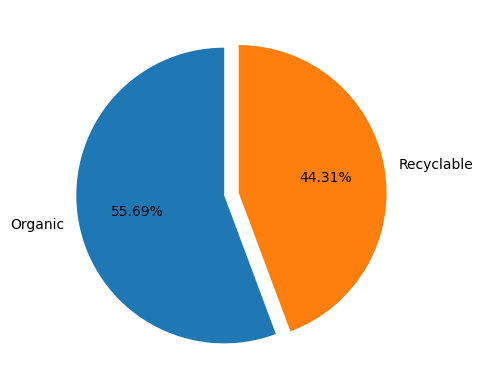

In [4]:
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot
import pandas as pd  # Assuming 'data' is a pandas DataFrame

color = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%', startangle = 90, explode=[0.05,0.05])

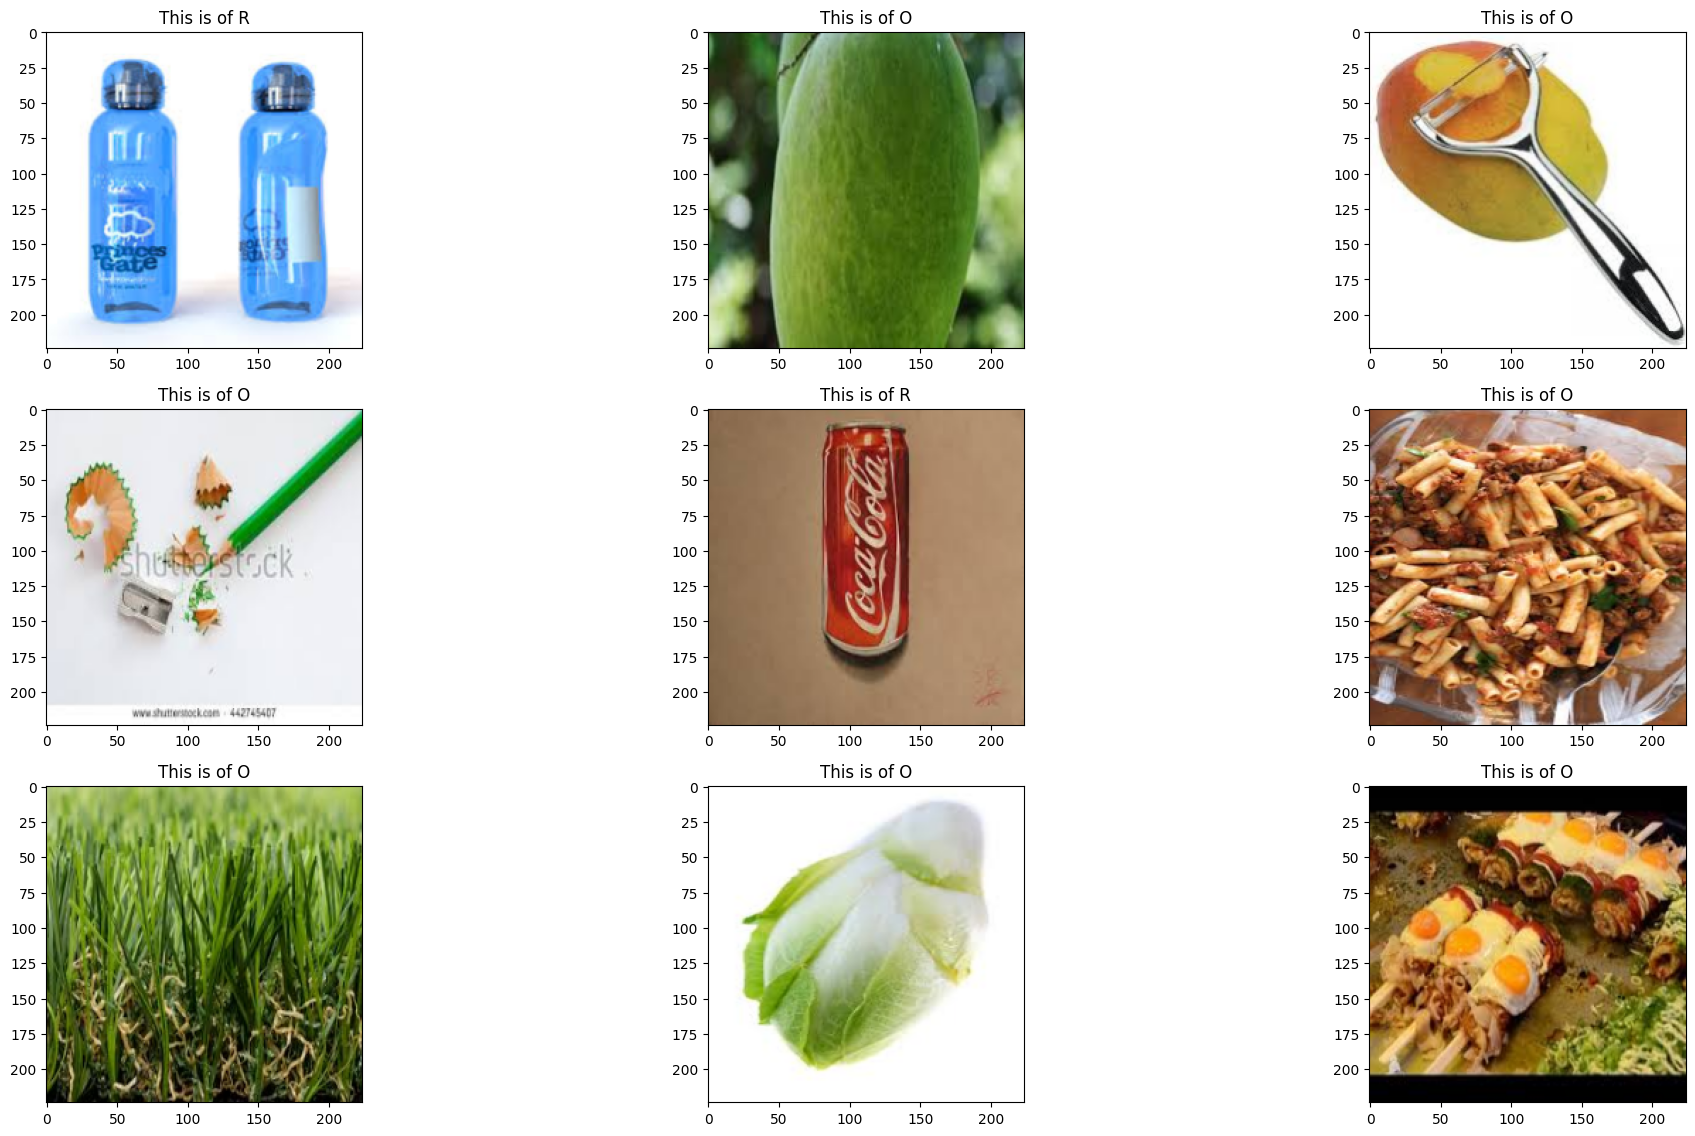

In [5]:
#to train

plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
## CNN Classifications - Convolution neural network
from tensorflow.keras.models import Sequential  # Importing Sequential model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout  # Importing necessary layers

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=256

In [11]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Define the paths (replace these with actual dataset folder paths)
train_path = "DATASET\TRAIN"  # Replace with actual path
test_path = "DATASET\TEST"    # Replace with actual path

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14068\3316979339.py:2: SyntaxWarning: invalid escape sequence '\T'
  train_path = "DATASET\TRAIN"  # Replace with actual path
C:\Users\Hp\AppData\Local\Temp\ipykernel_14068\3316979339.py:3: SyntaxWarning: invalid escape sequence '\T'
  test_path = "DATASET\TEST"    # Replace with actual path


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
# Get the actual number of classes
num_classes = len(train_generator.class_indices)
print(f"Detected {num_classes} classes")

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Dynamically set output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Detected 2 classes
Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1472s 2s/step - accuracy: 0.7438 - loss: 6.3422 - val_accuracy: 0.8778 - val_loss: 0.3535
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1338s 2s/step - accuracy: 0.8670 - loss: 0.3303 - val_accuracy: 0.7748 - val_loss: 0.5639
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1337s 2s/step - accuracy: 0.9252 - loss: 0.2074 - val_accuracy: 0.8329 - val_loss: 0.4977
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1347s 2s/step - accuracy: 0.9643 - loss: 0.1200 - val_accuracy: 0.8046 - val_loss: 0.6550
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1341s 2s/step - accuracy: 0.9781 - loss: 0.0822 - val_accuracy: 0.8269 - val_loss: 0.6770
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1314s 2s/step - accuracy: 0.9766 - loss: 0.0833 - val_accuracy: 0.7596 - val_loss: 0.8133
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1305s 2s/step - accuracy: 0.9827 - loss: 0.0726 - val_accuracy: 0.8301 - val_loss: 0.8158
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1305s 2s/step - accuracy: 0.986

In [17]:
model.save('plastic_waste_classification_model.keras')

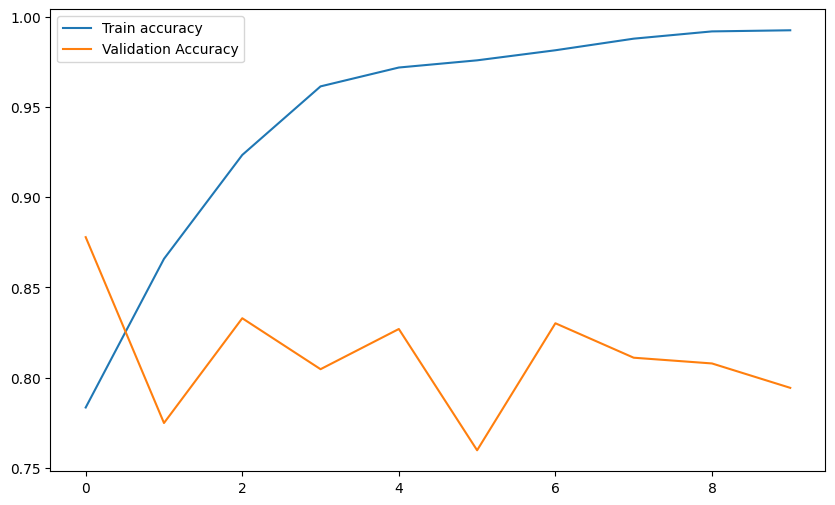

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

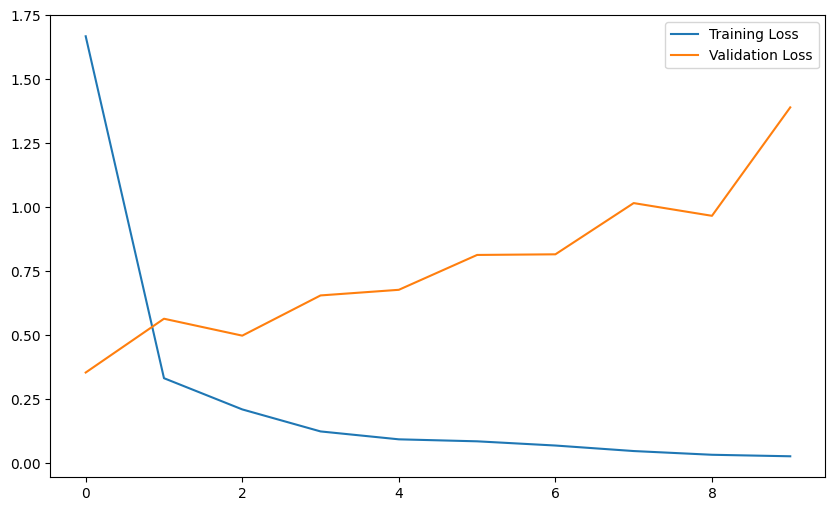

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show

In [21]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img=cv2.resize(img,(224,224))
    img=np.reshape(img,[-1,224,224,3])
    result=np.argmax(model.predict(img))
    if result== 0:
        print('The image shown is Recyclable waste')
    elif result == 1:
        print('The image shown is Organic waste')
        

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14068\1716670090.py:3: SyntaxWarning: invalid escape sequence '\T'
  test_img = cv2.imread('DATASET\TRAIN\O\O_11108.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
The image shown is Organic waste


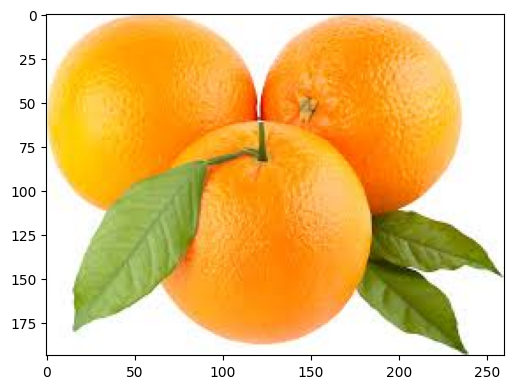

In [27]:
import cv2  # Import OpenCV
import numpy as np  # Import NumPy
test_img = cv2.imread('DATASET\TRAIN\O\O_11108.jpg')
predict_fun(test_img)

In [28]:
model.save('plastic_waste_classification_model.keras')